<a href="https://colab.research.google.com/github/rndrpp/Home-Credit-Scorecard-Model/blob/main/Home_Credit_Scorecard_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import lightgbm


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Rakamin/HCI/application_train.csv')

train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
train.isnull().mean().sort_values(ascending = False)


COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
                              ...   
NAME_HOUSING_TYPE           0.000000
NAME_FAMILY_STATUS          0.000000
NAME_EDUCATION_TYPE         0.000000
NAME_INCOME_TYPE            0.000000
SK_ID_CURR                  0.000000
Length: 122, dtype: float64

In [ ]:
def imputation(df):
  for cat in df.describe(include='object').columns:
    df[cat].fillna(df[cat].mode(), inplace=True)
    
  for num in df.describe().columns:
    df[num].fillna(df[num].median(), inplace=True)

In [ ]:
train.describe(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
train['NAME_HOUSING_TYPE'].mode().isnull()

0    False
dtype: bool

In [ ]:
imputation(train)

In [ ]:
train.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

# Data Visualization and Business Insight

In [ ]:
cols1=[]
cols2=[]
for col in train.columns:
    if (train[col].nunique())<100:
        cols1.append(col)
    else:
        cols2.append(col)

In [ ]:
train[cols2].describe()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_1,...,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE
count,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.504311,...,0.979629,0.757577,0.027969,0.056203,0.084282,0.091688,0.002644,0.014366,0.086258,-962.858119
std,102790.175348,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,4363.988632,141275.766519,3522.886321,1509.450419,0.139408,...,0.042910,0.064878,0.043197,0.053150,0.054032,0.080999,0.026516,0.048610,0.079110,826.807226
min,100002.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.014568,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000
25%,189145.500000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,-7479.500000,-4299.000000,0.505998,...,0.981600,0.758500,0.020800,0.048700,0.076100,0.074900,0.000000,0.003100,0.067000,-1570.000000
50%,278202.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.000000,-4504.000000,-3254.000000,0.505998,...,0.981600,0.758500,0.020800,0.048700,0.076100,0.074900,0.000000,0.003100,0.068800,-757.000000
75%,367142.500000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,-2010.000000,-1720.000000,0.505998,...,0.982100,0.758500,0.020800,0.048700,0.076100,0.074900,0.000000,0.003100,0.070300,-274.000000
max,456255.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,0.000000,0.000000,0.962693,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

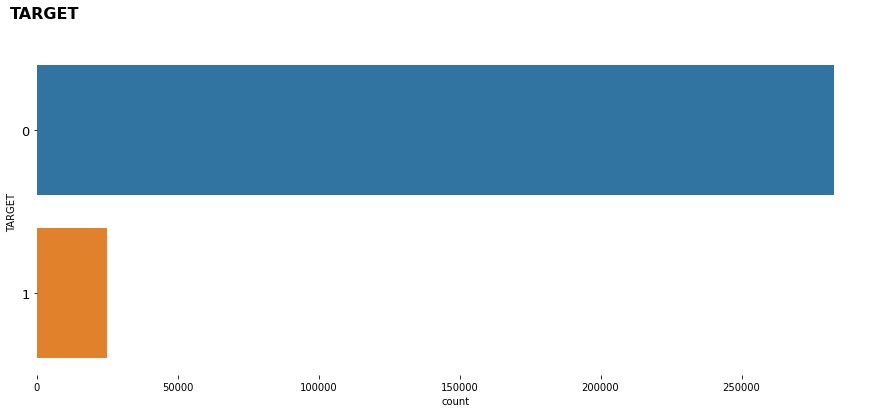

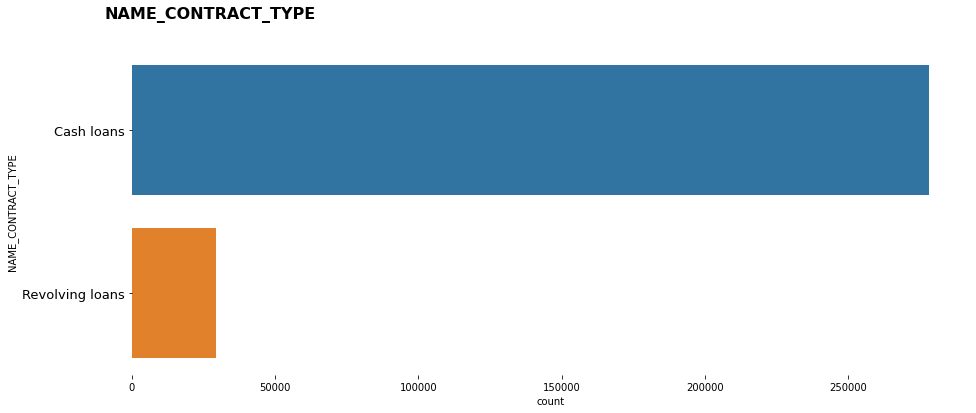

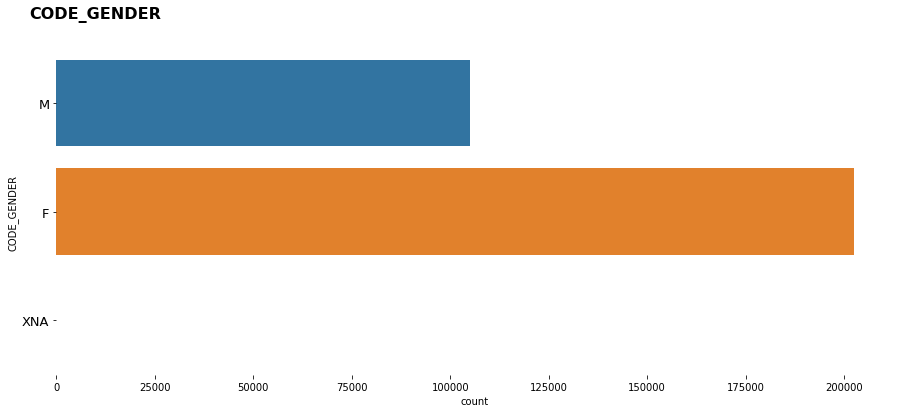

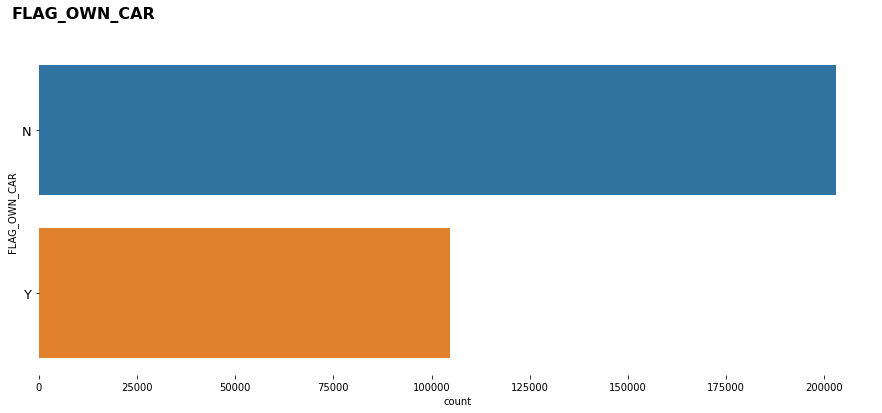

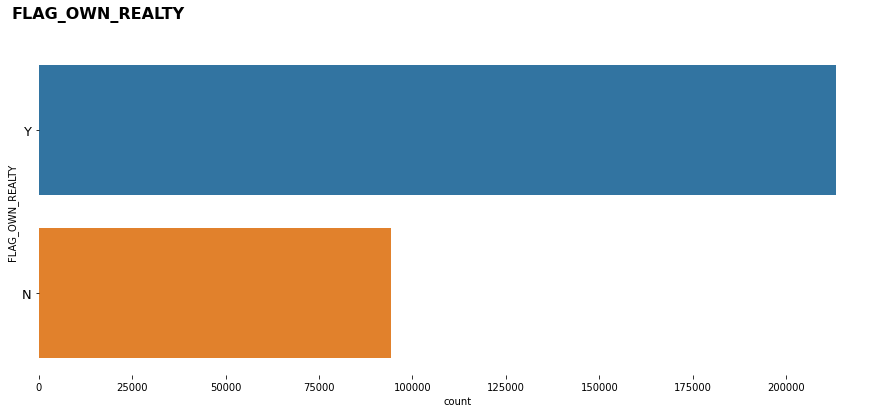

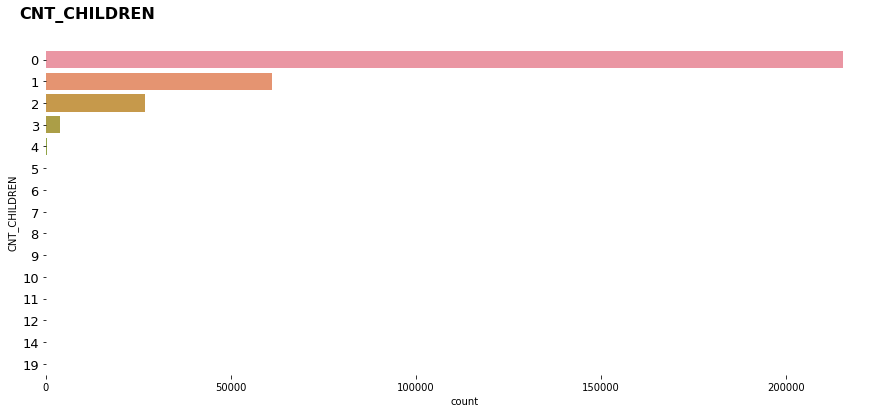

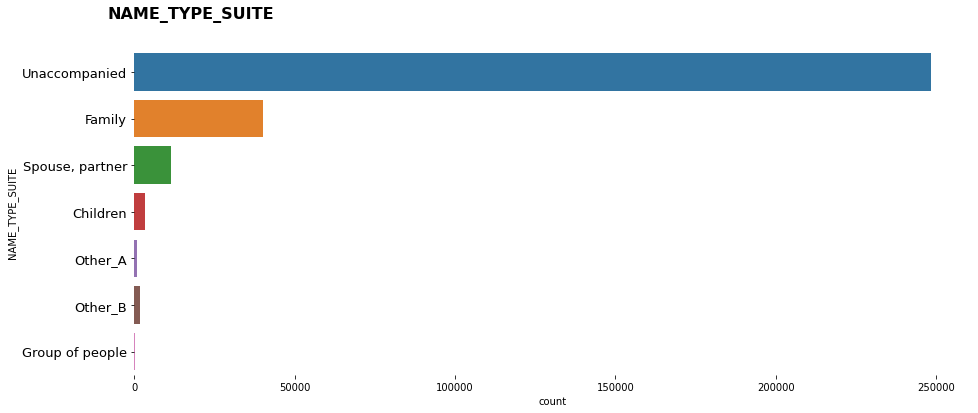

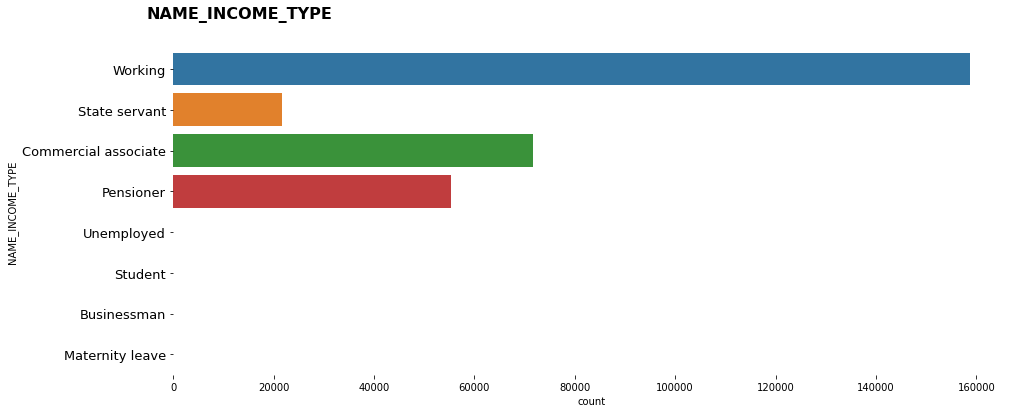

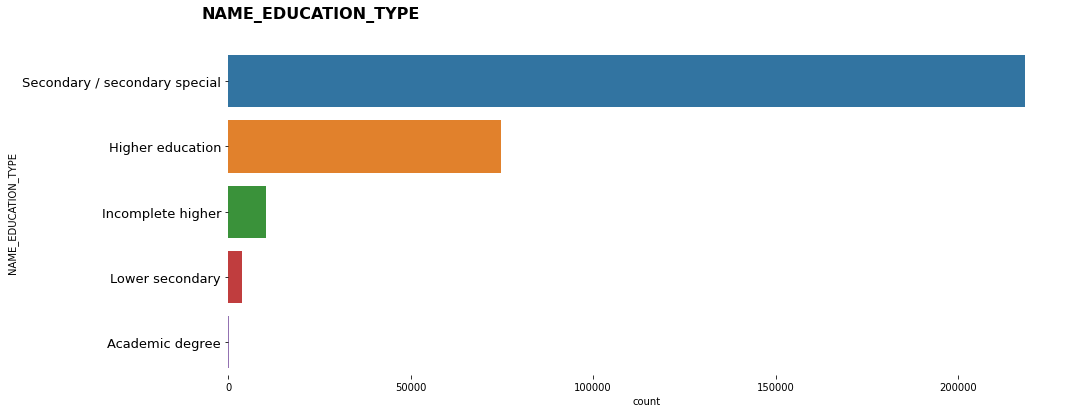

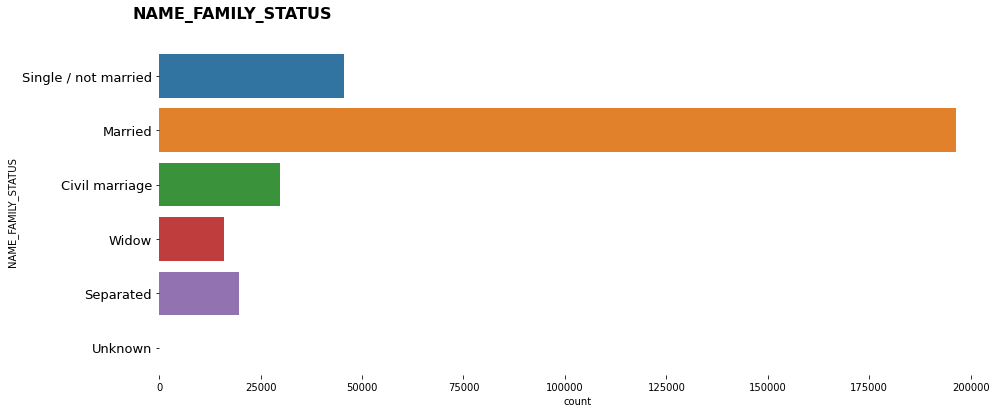

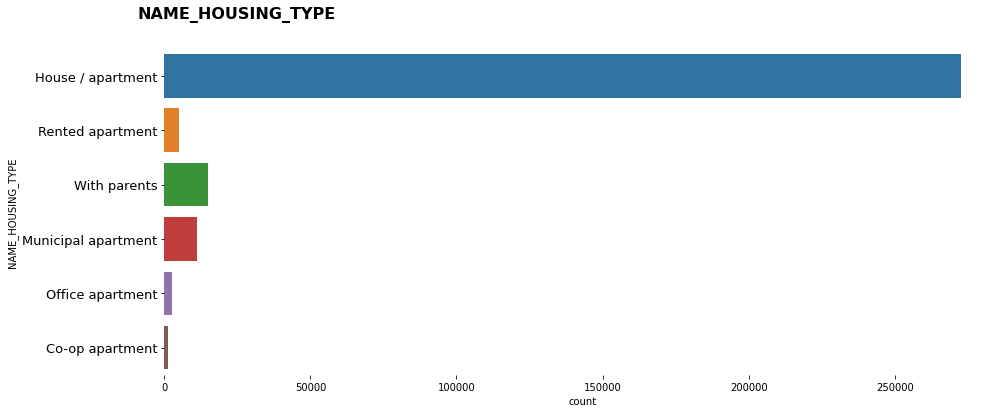

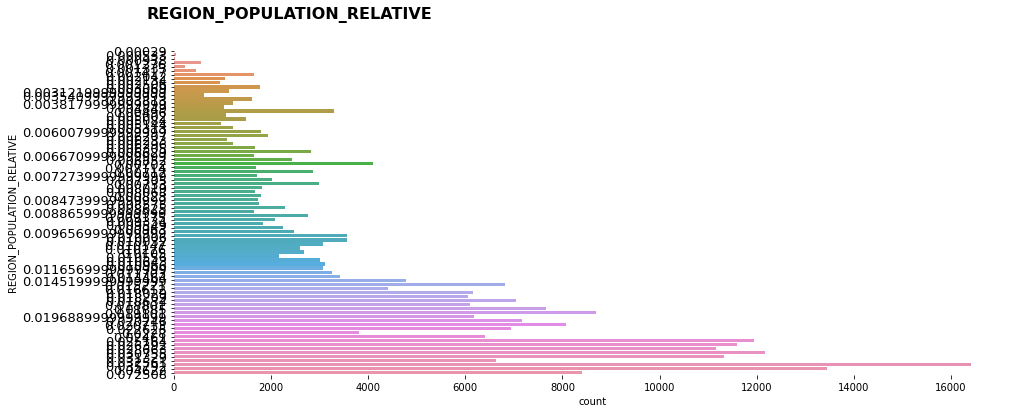

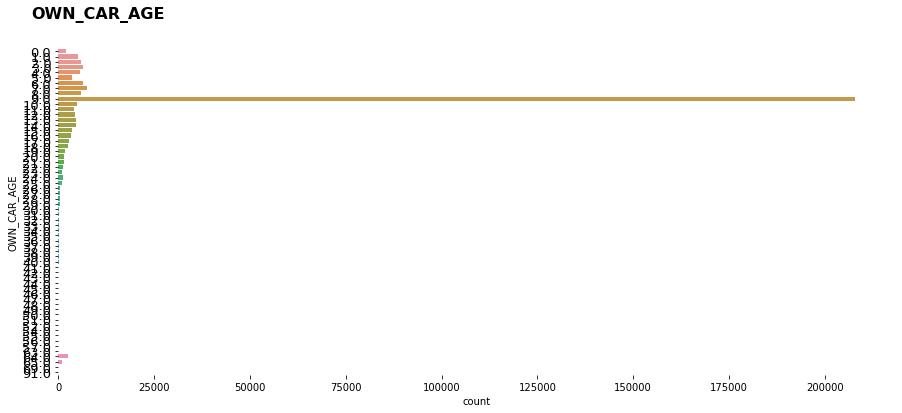

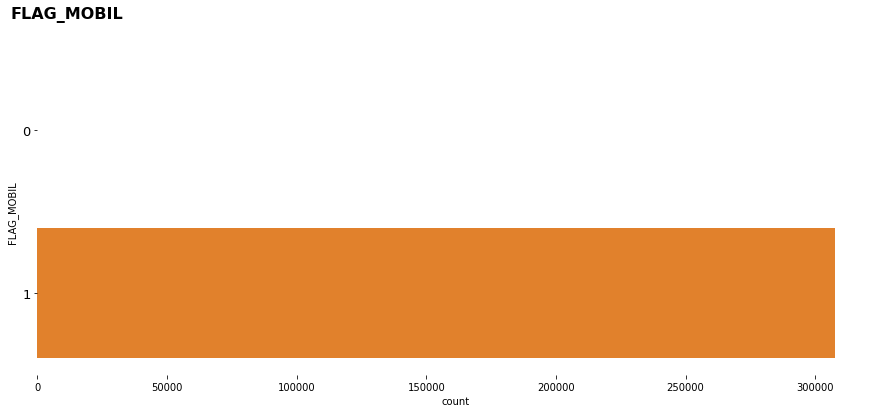

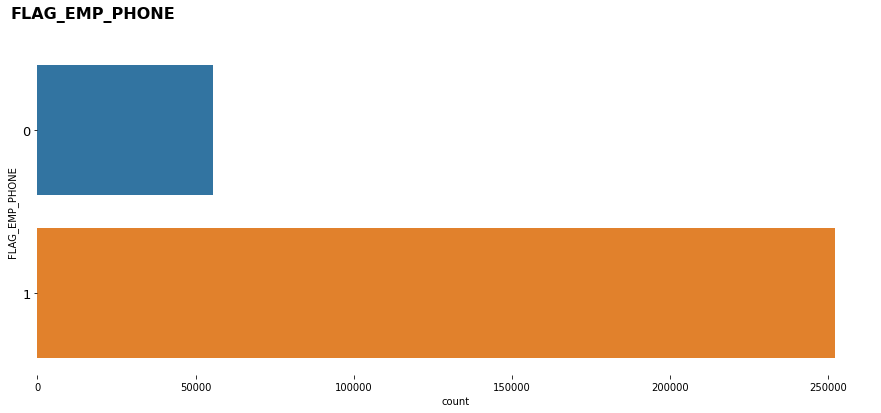

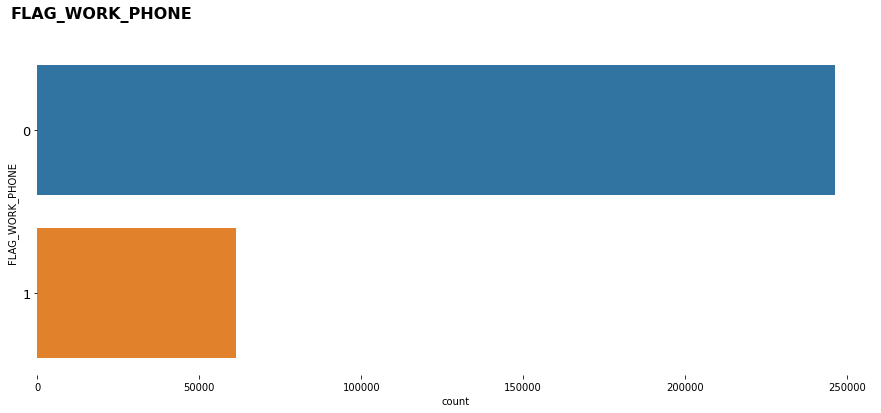

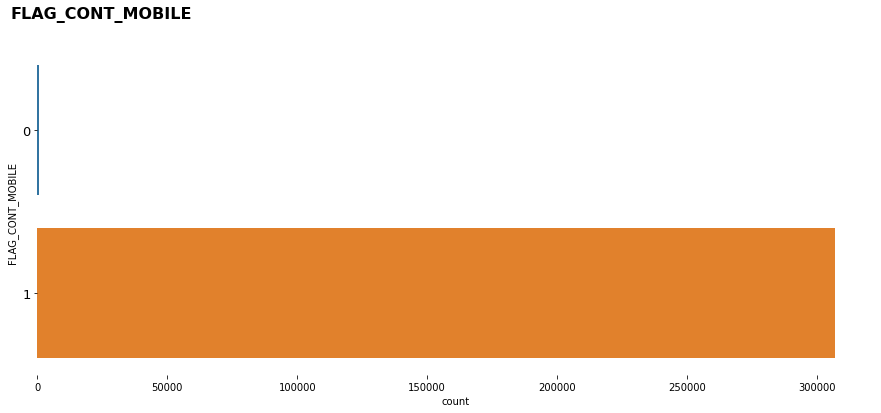

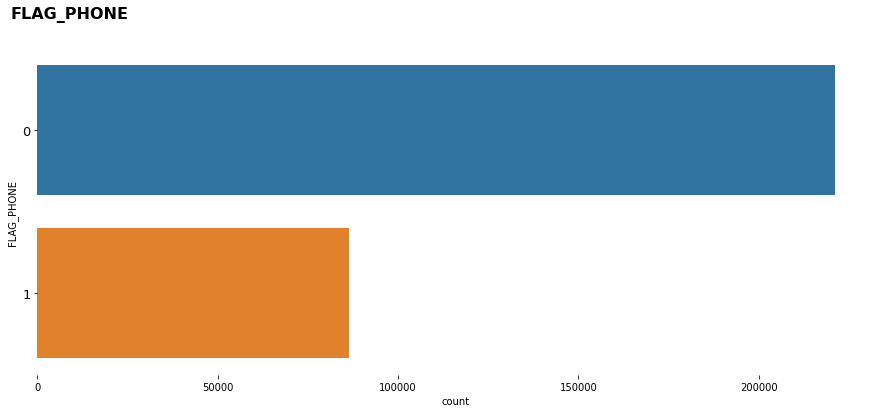

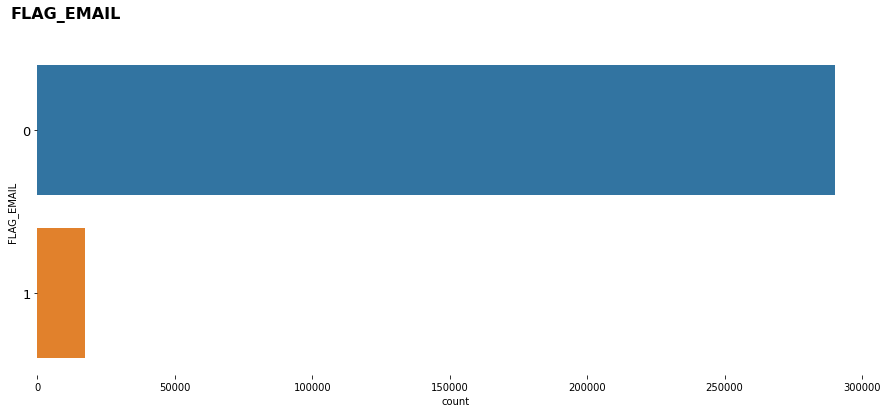

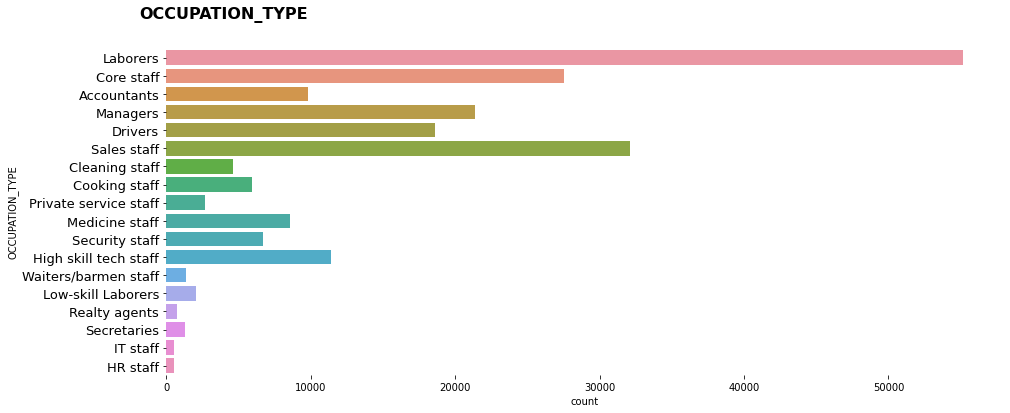

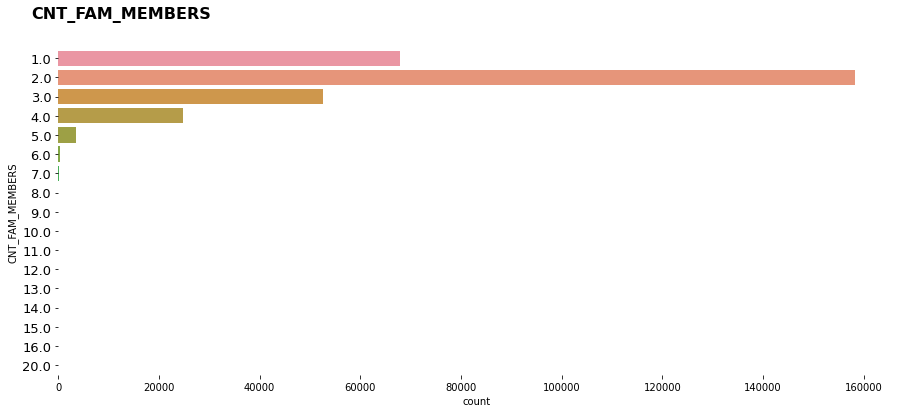

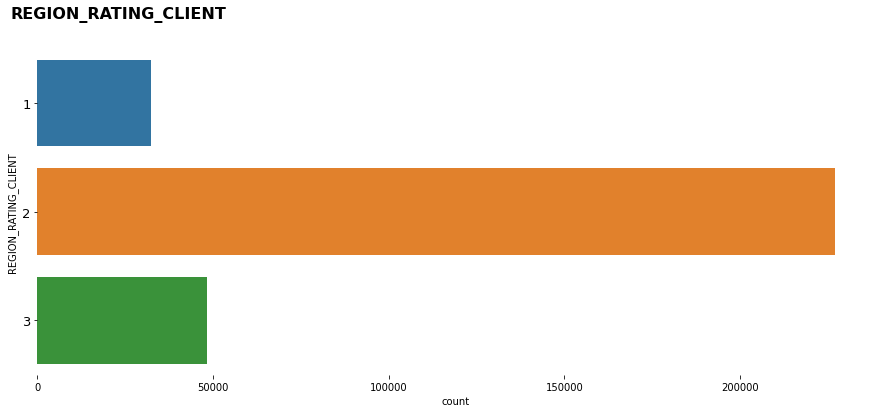

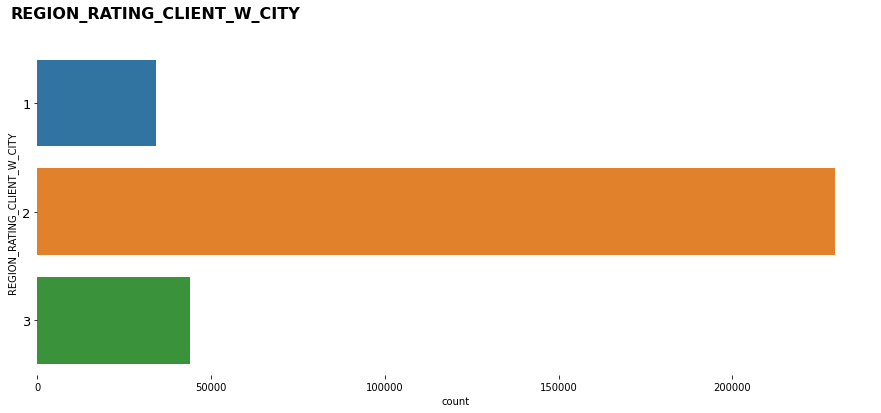

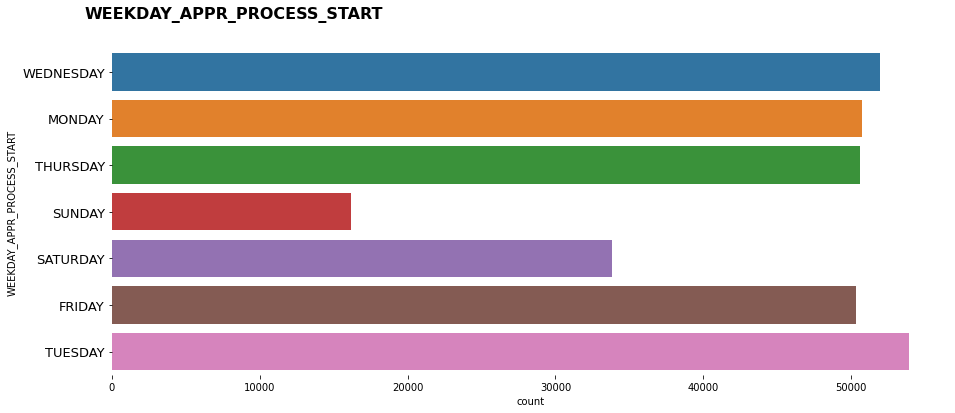

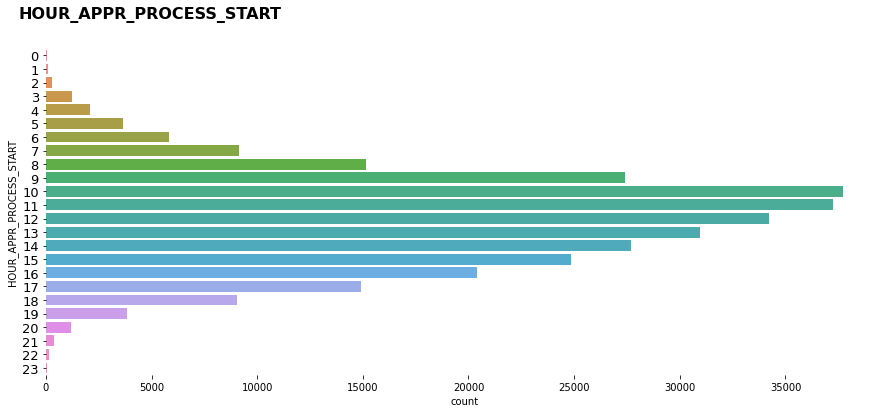

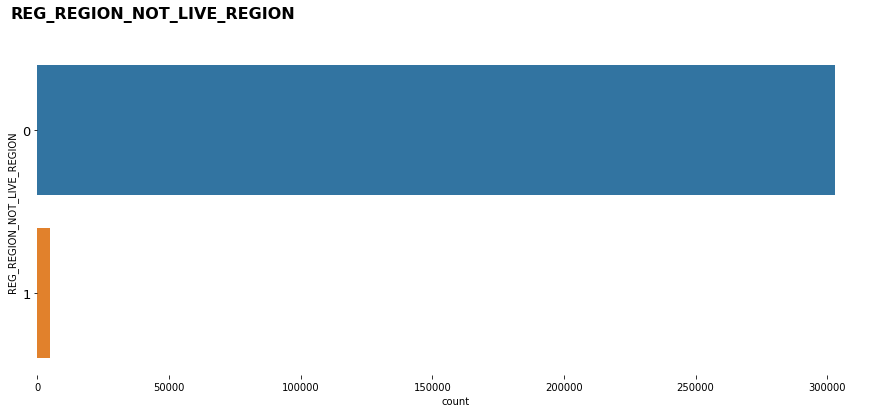

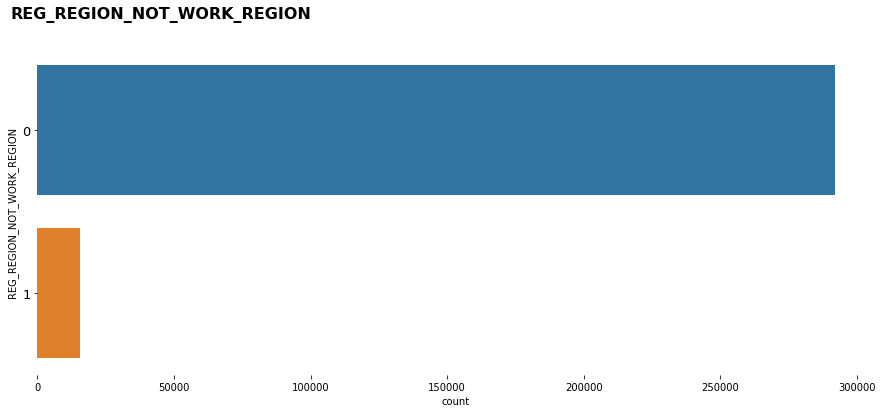

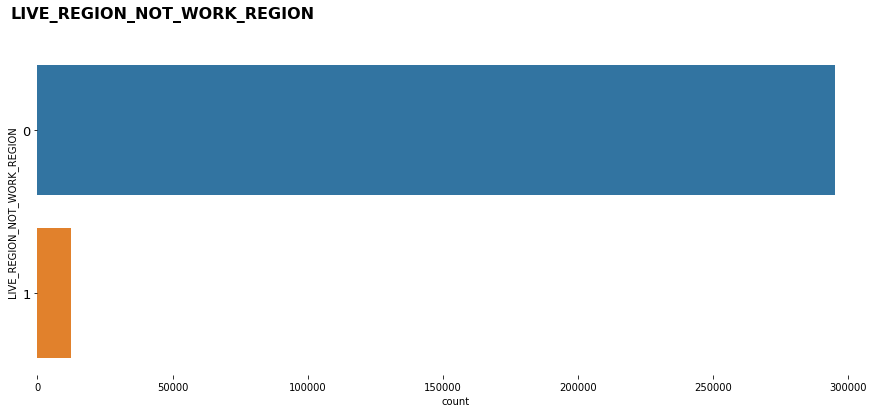

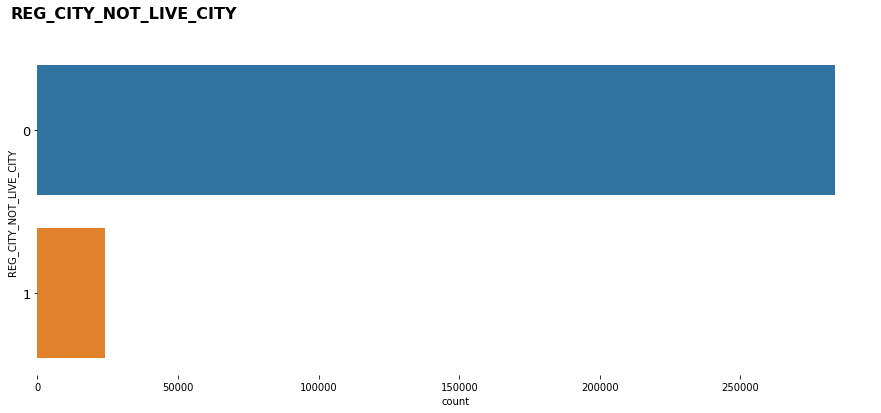

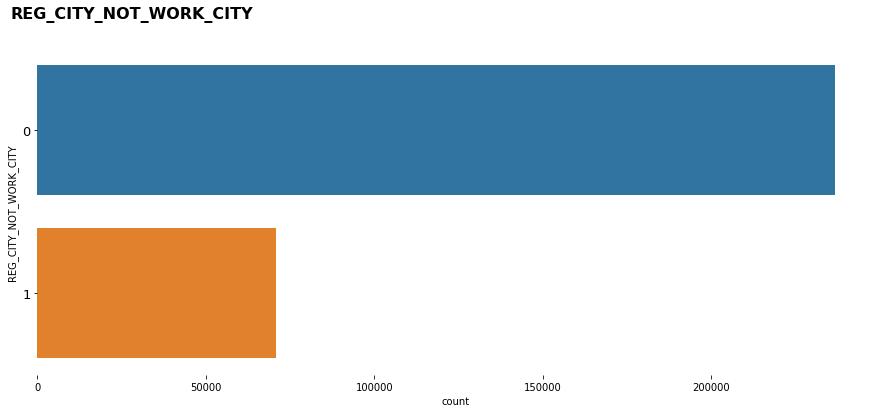

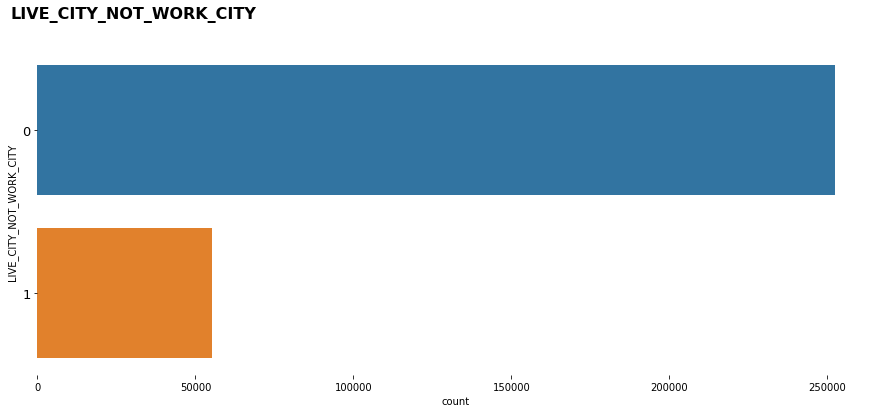

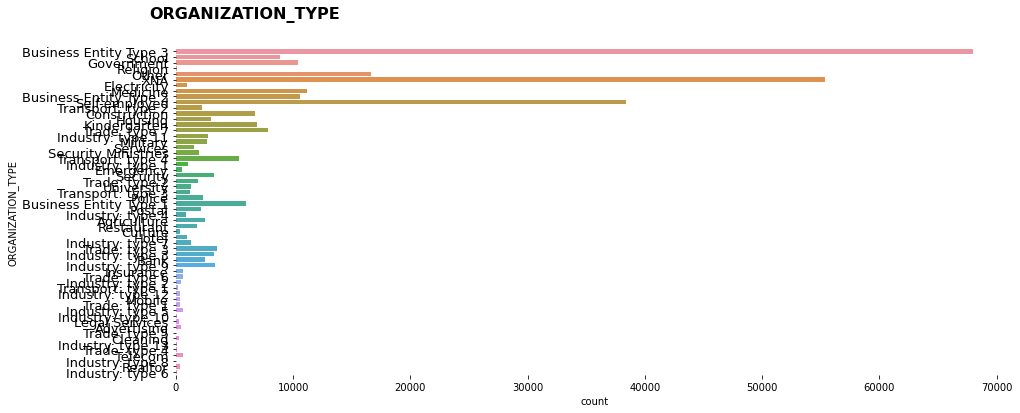

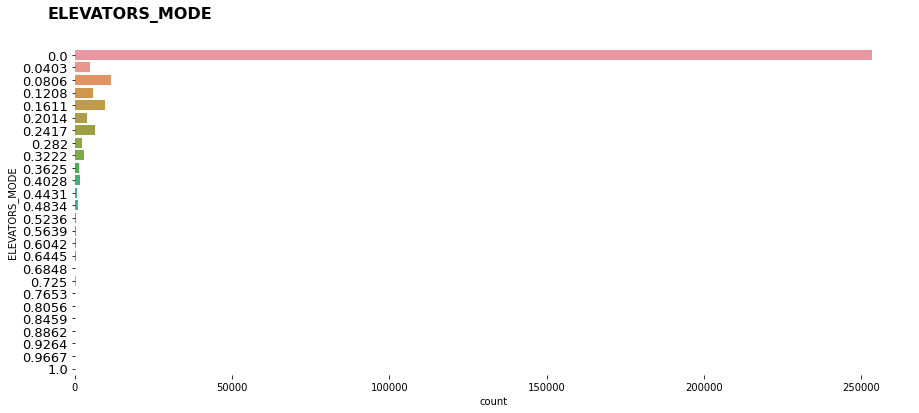

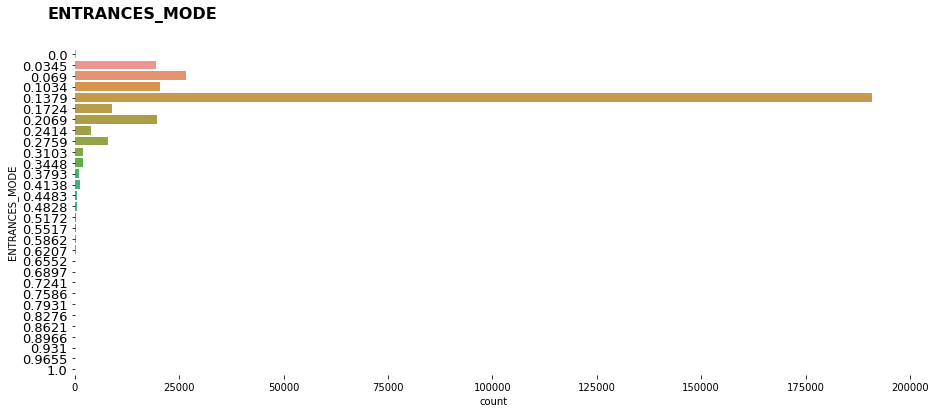

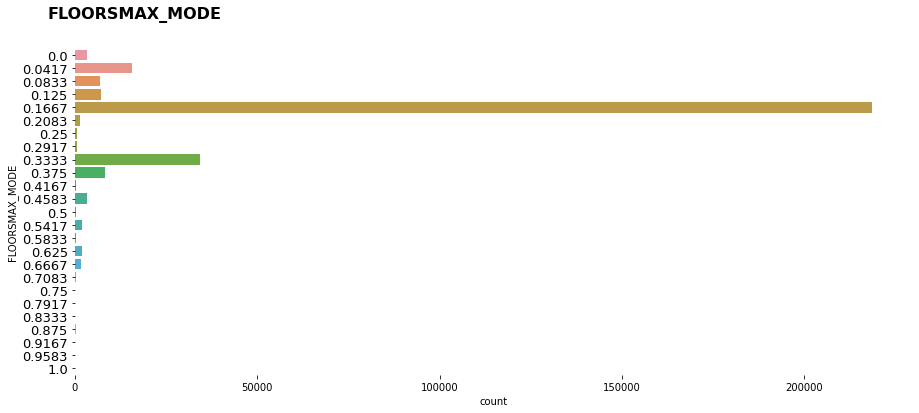

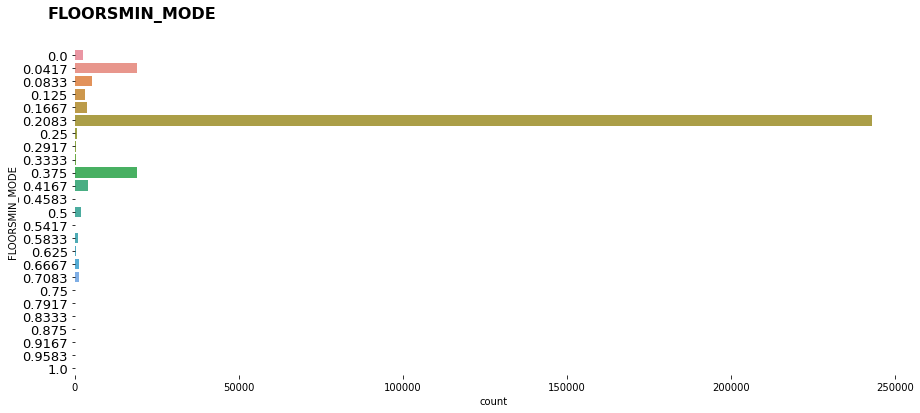

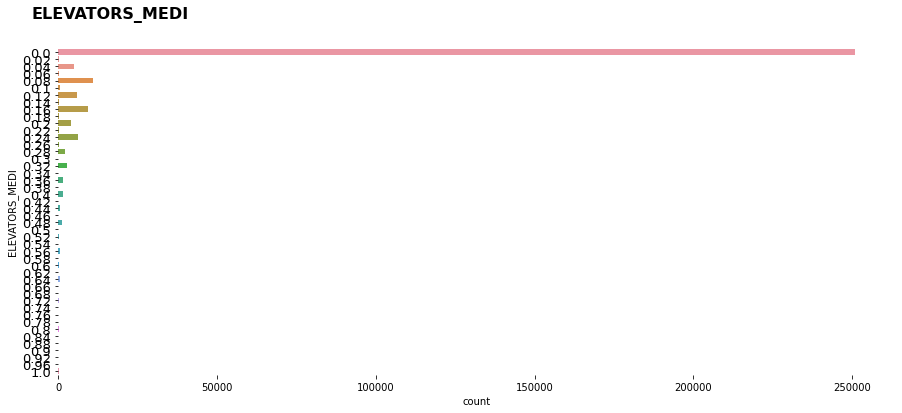

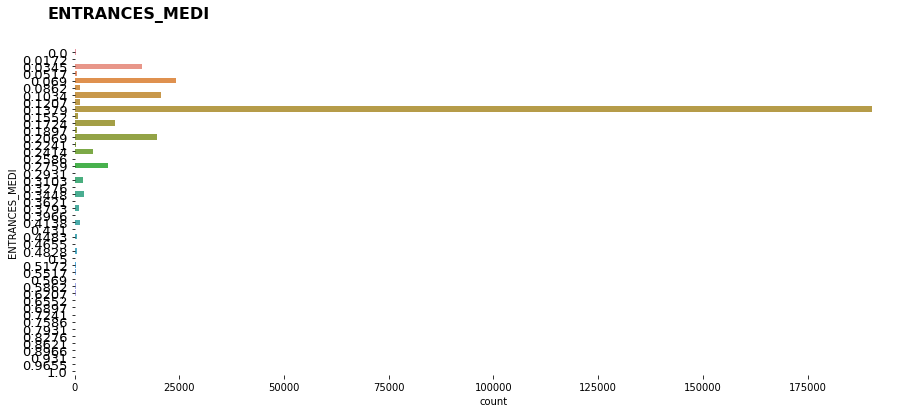

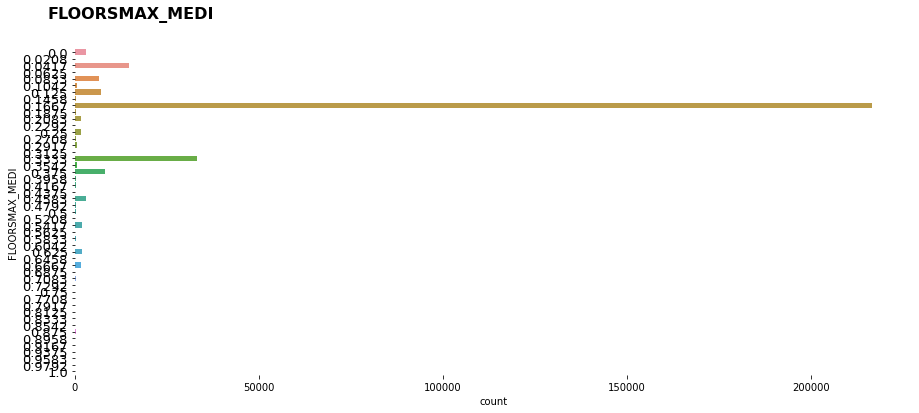

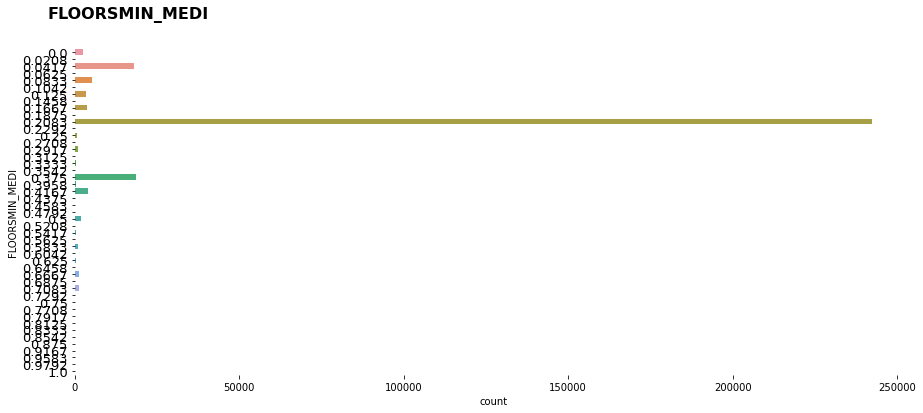

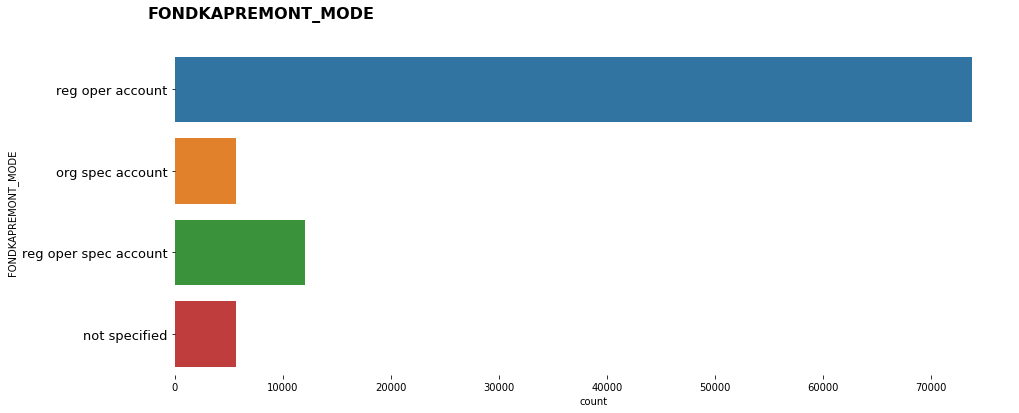

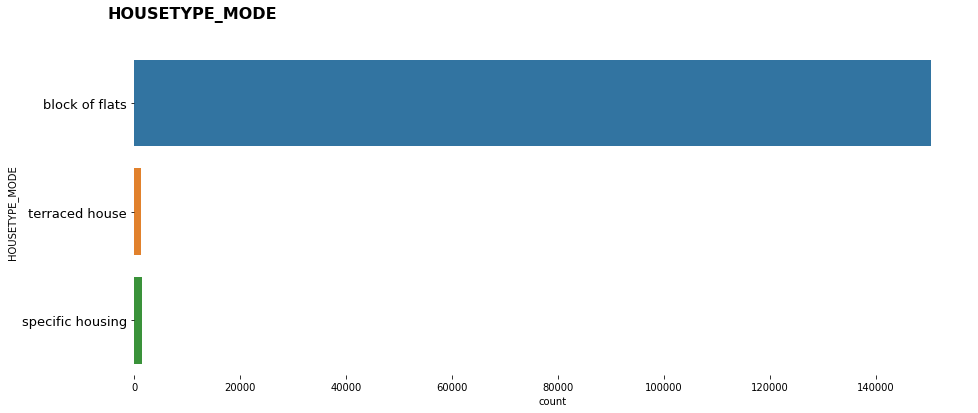

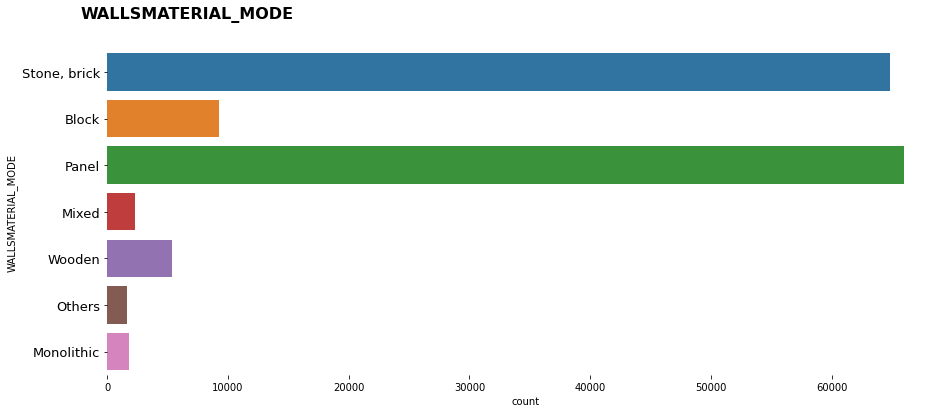

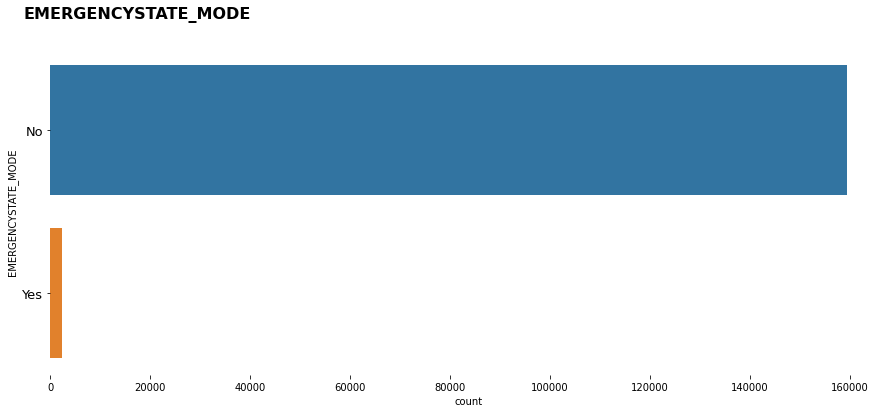

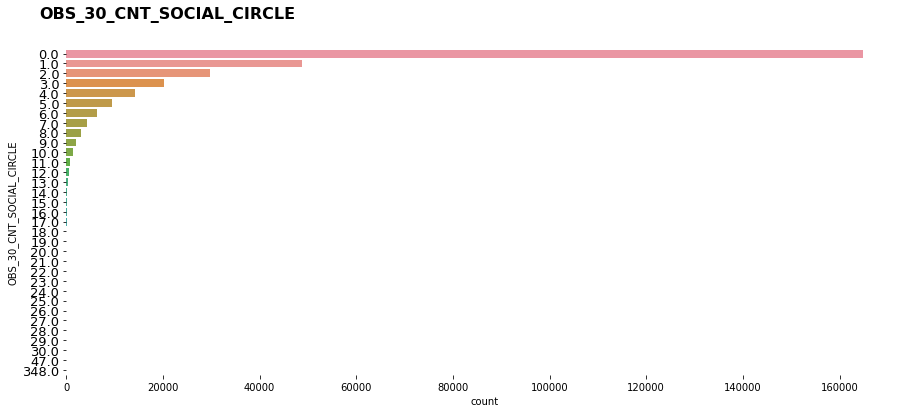

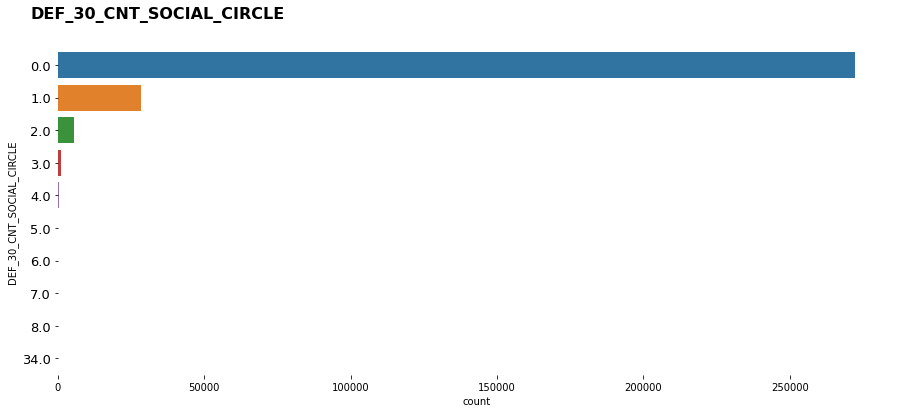

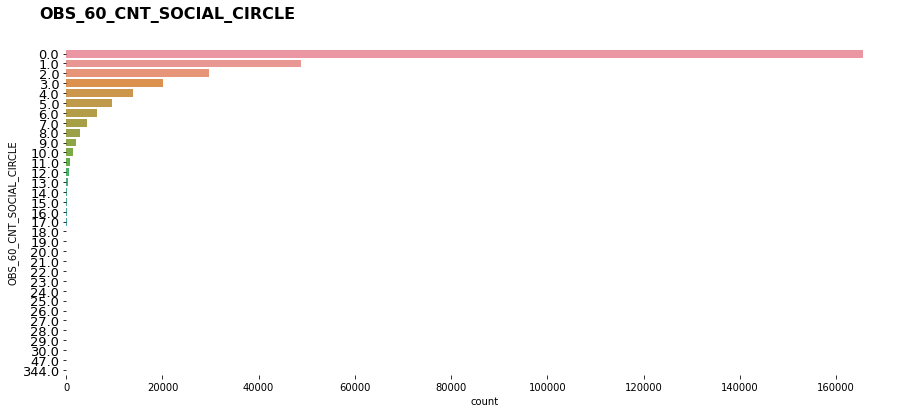

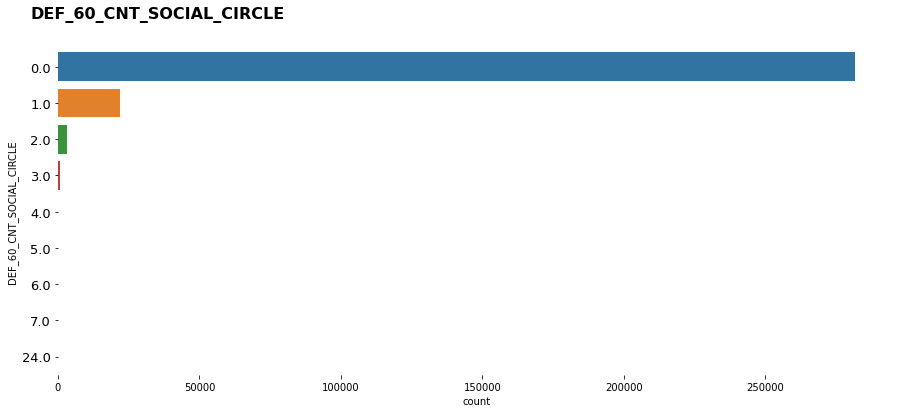

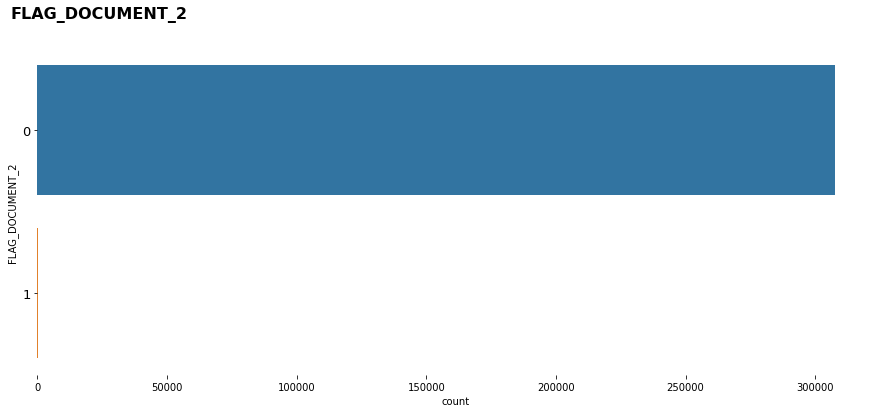

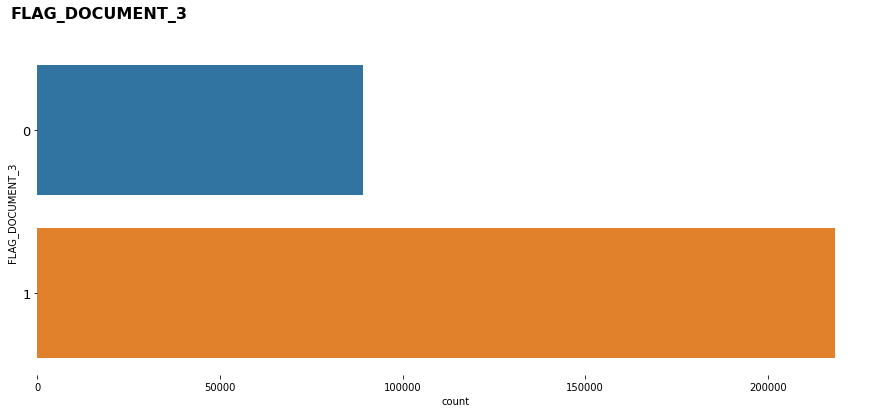

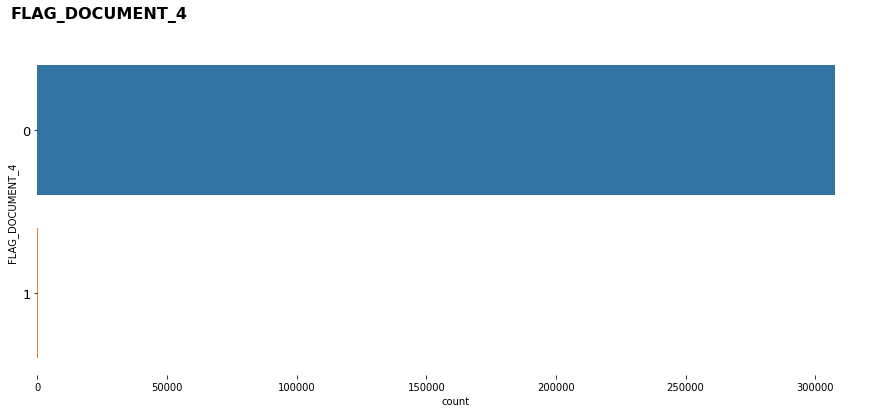

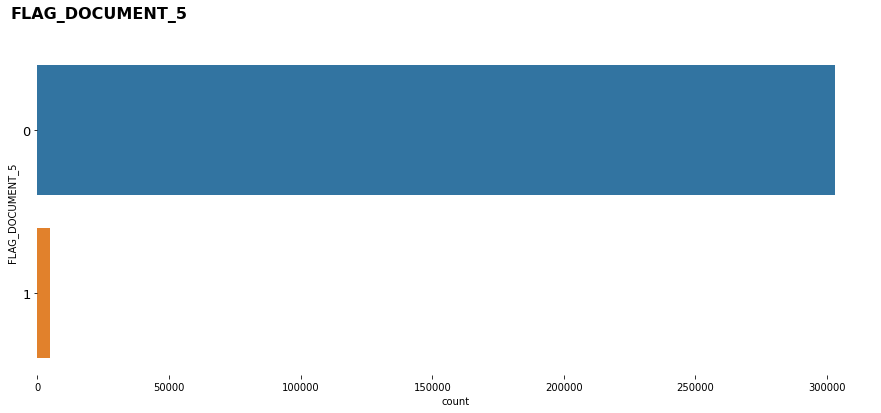

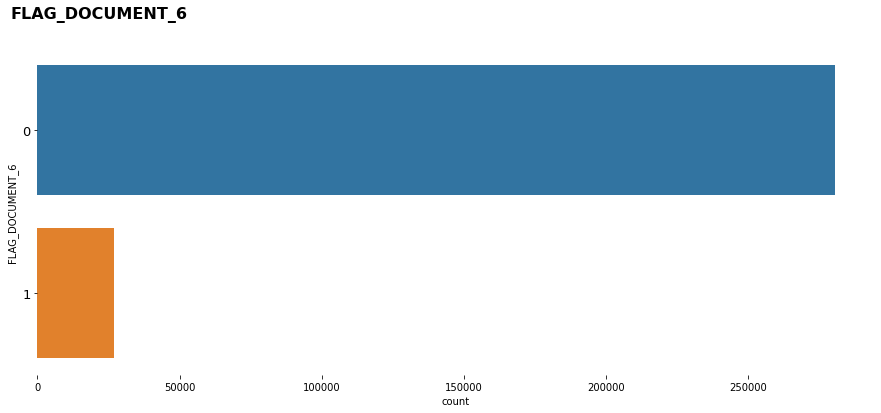

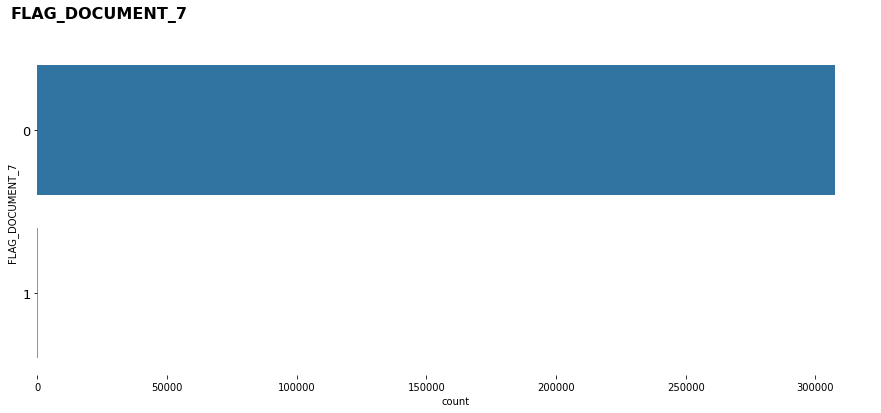

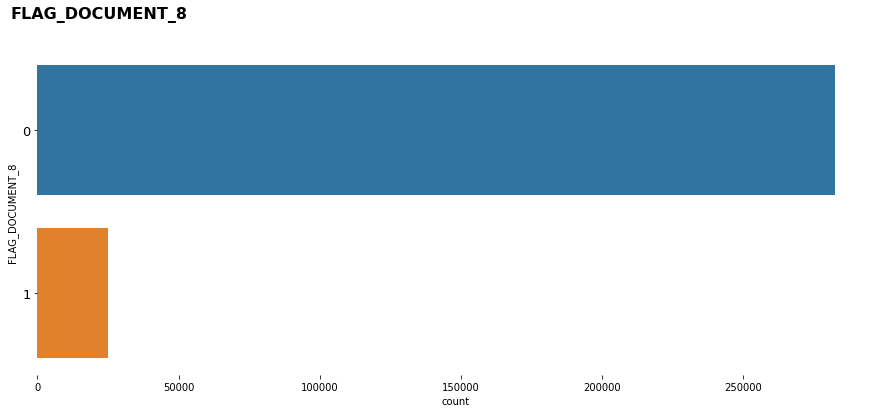

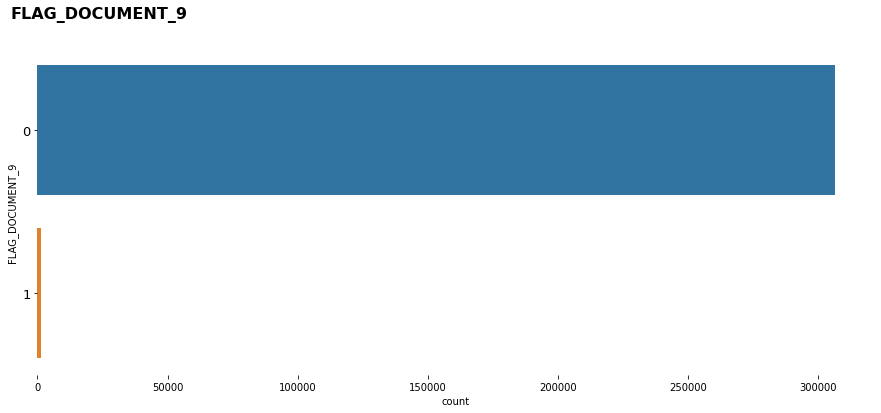

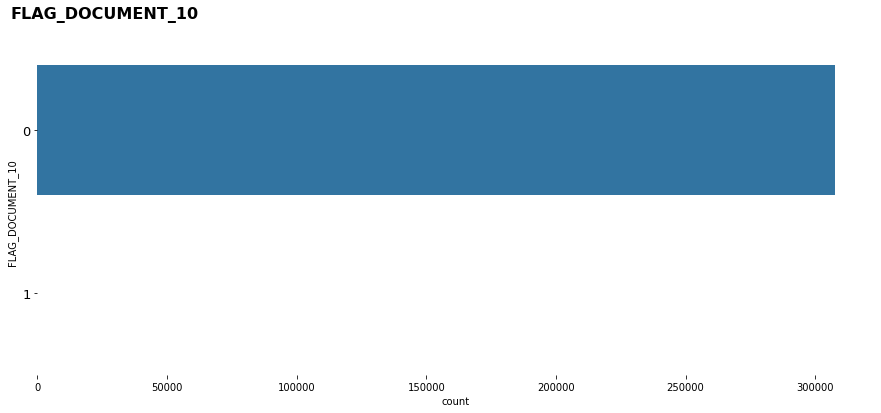

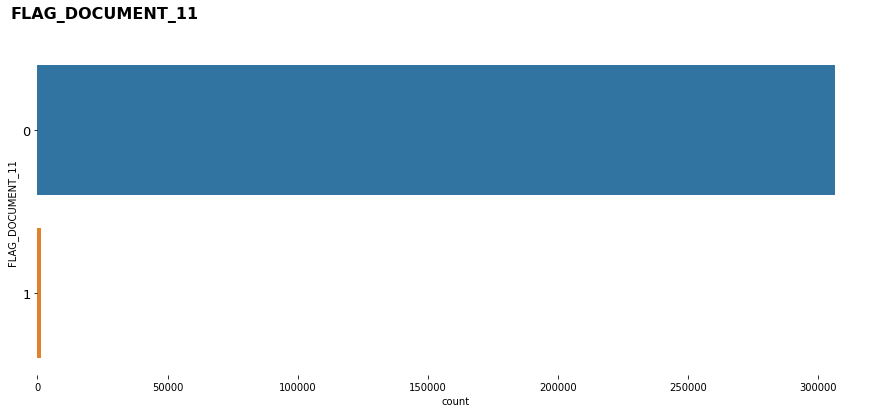

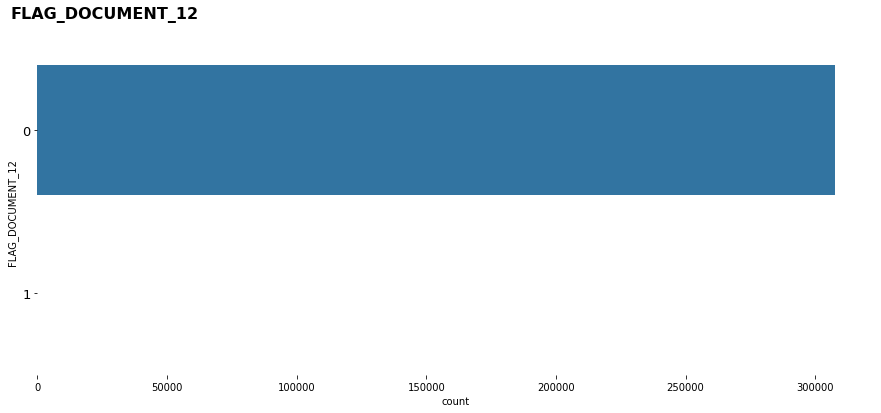

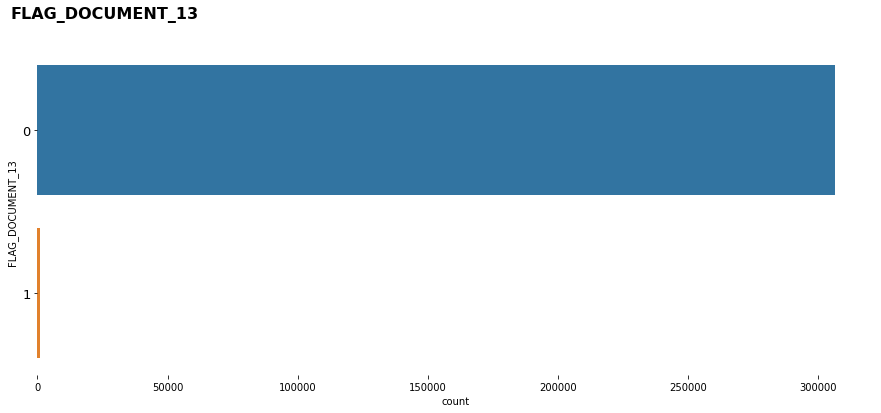

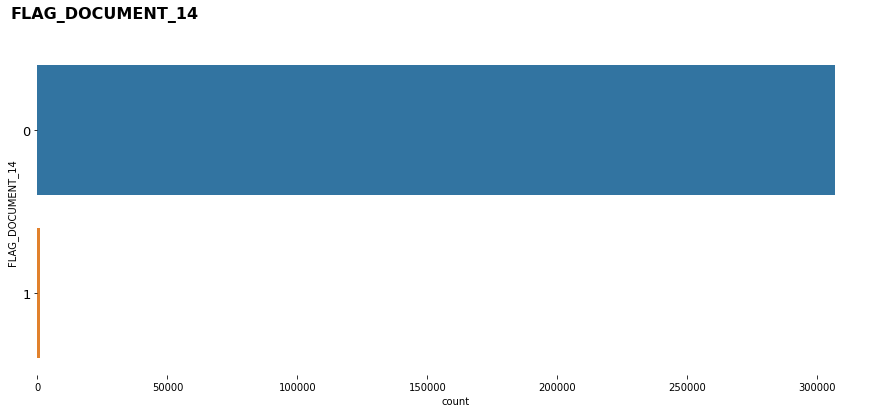

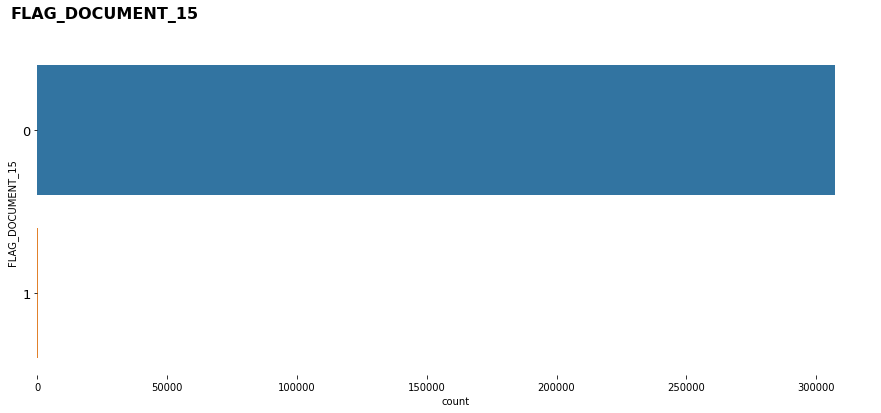

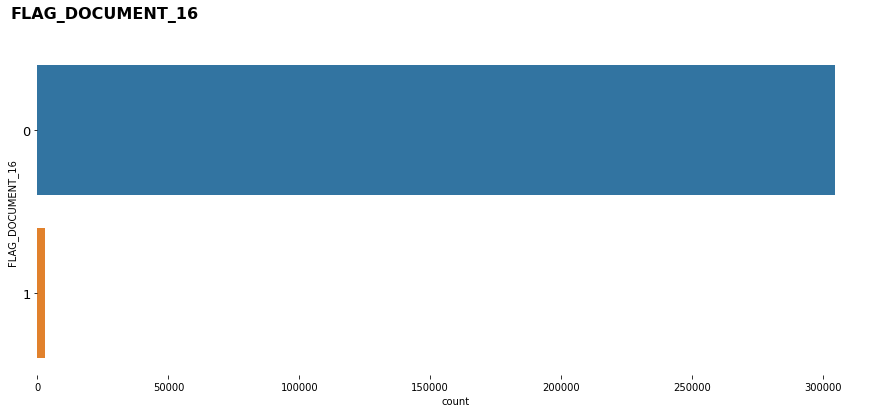

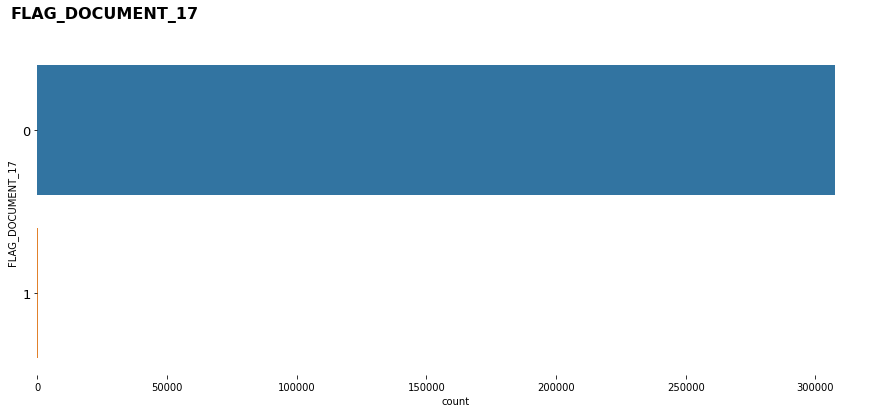

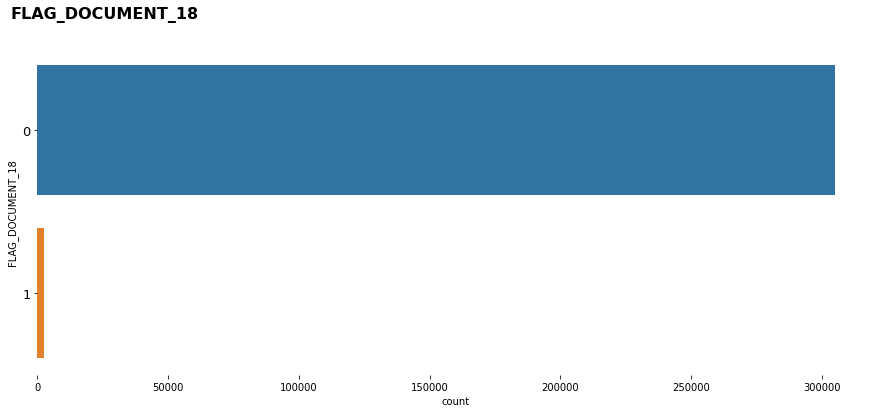

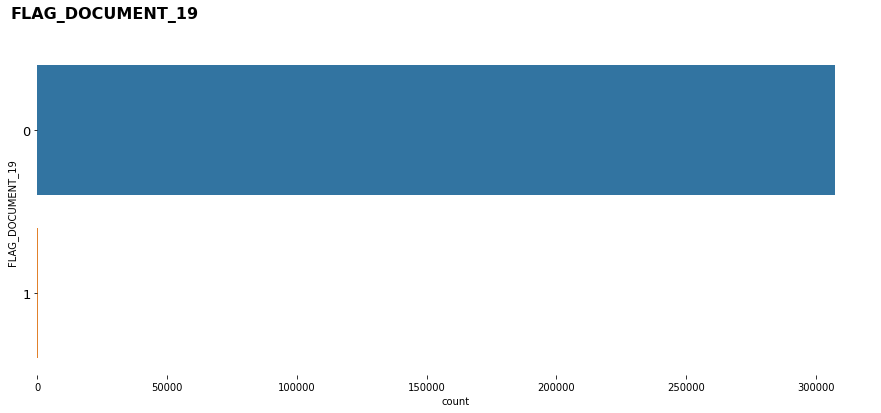

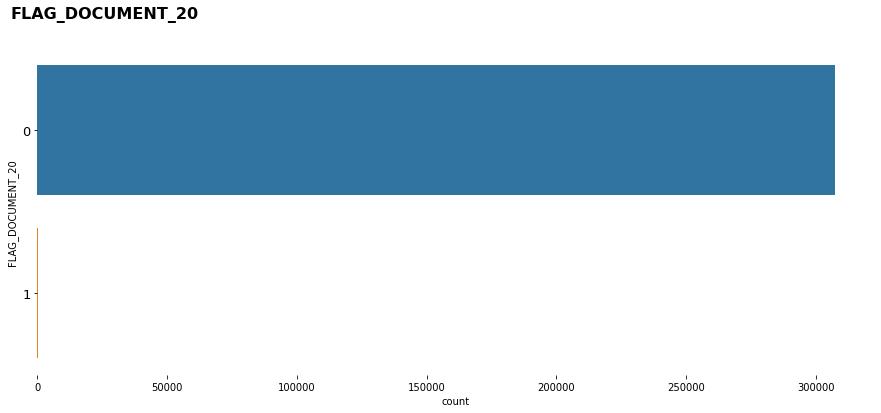

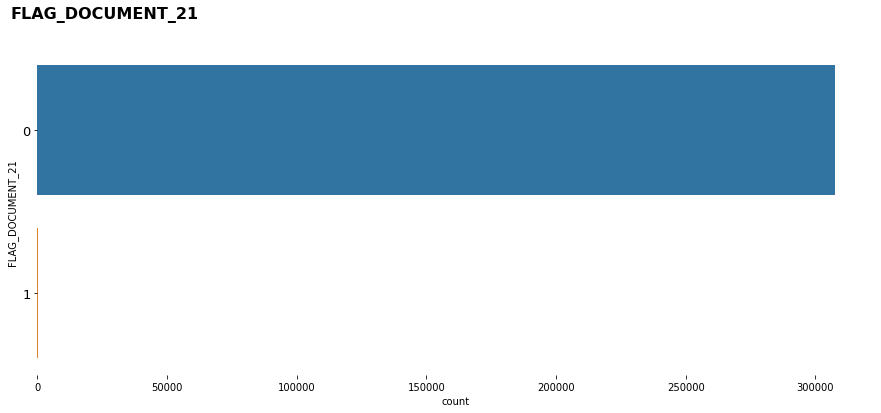

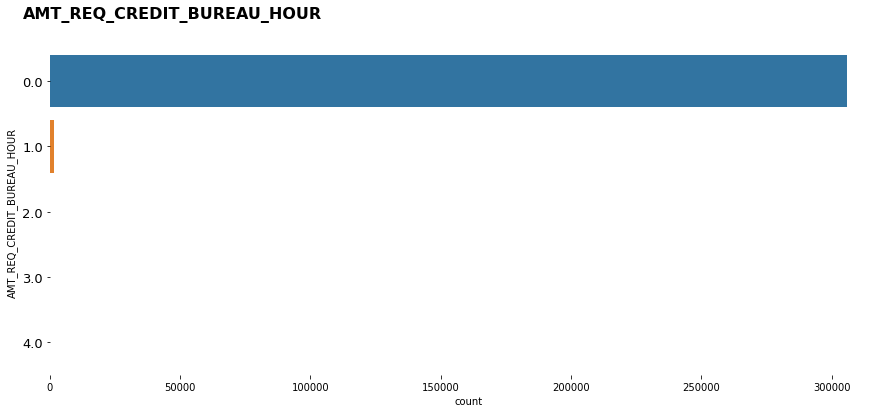

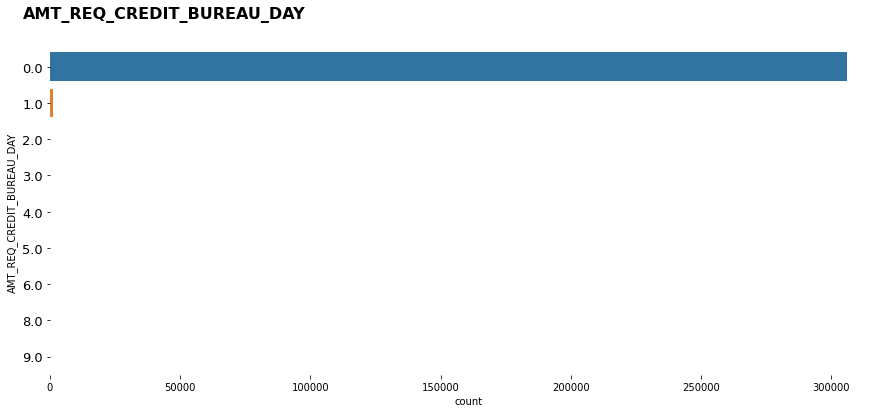

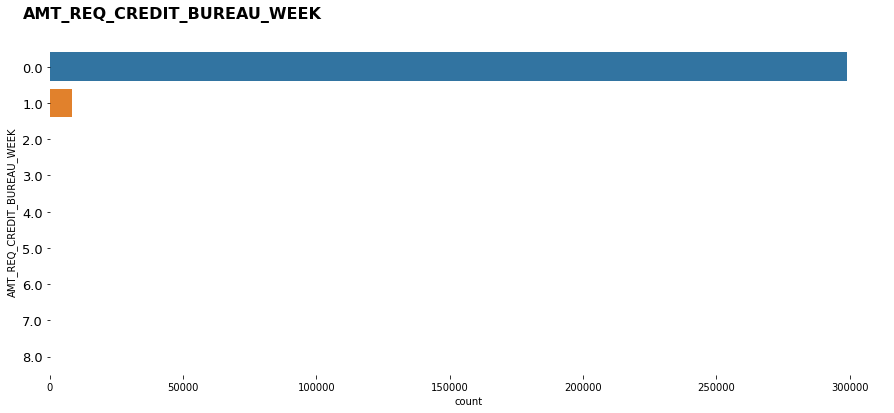

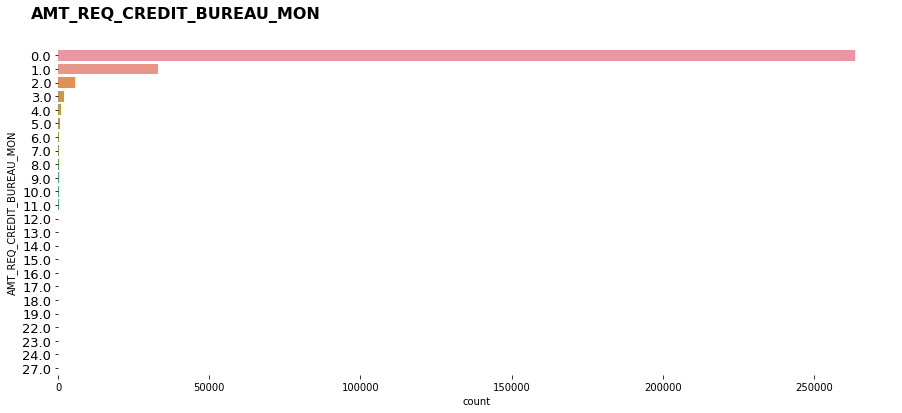

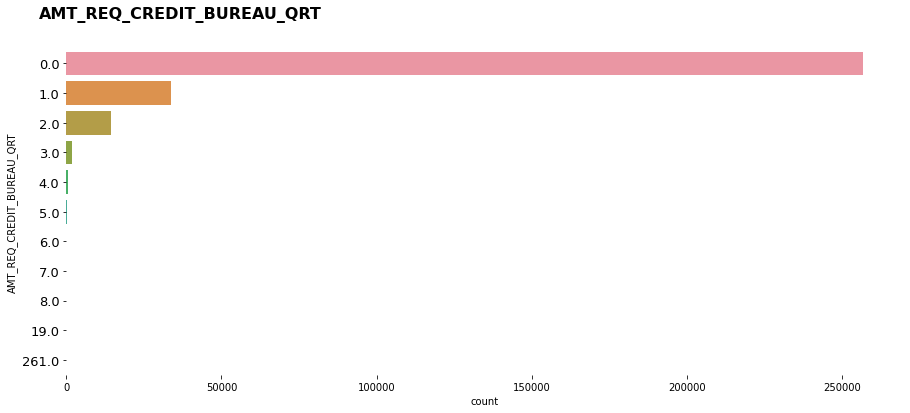

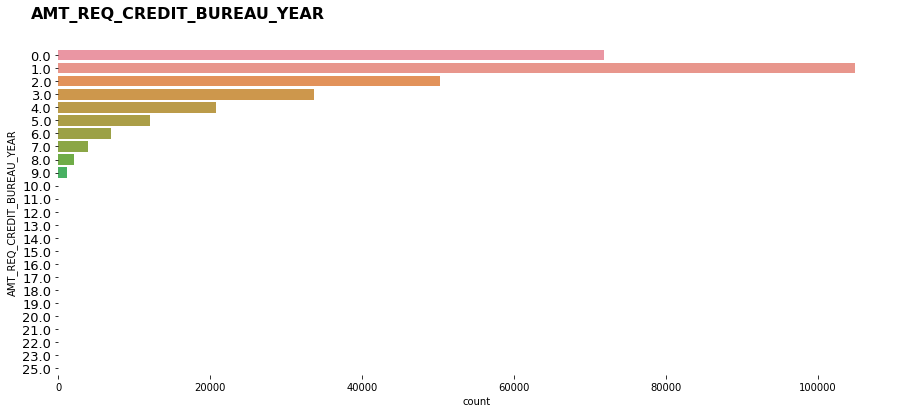

In [ ]:
for col in cols1:
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.countplot(data=train, y=train[col])
  fig.text(0.1, 0.95, f'{col}', fontsize=16, fontweight='bold')
  # plt.xlabel('value ', fontsize=10)
  # plt.ylabel('count',fontsize=10)
  plt.yticks(fontsize=13)
  plt.box(False)

In [ ]:
target_by_income = train.groupby(['NAME_INCOME_TYPE','TARGET'])['AMT_INCOME_TOTAL'].mean().unstack()

target_by_income

TARGET,0,1
NAME_INCOME_TYPE,,
Businessman,652500.000000,NaN
Commercial associate,204147.589265,188217.323228
Maternity leave,195000.000000,58500.000000
Pensioner,136449.361318,135556.940644
State servant,180655.430487,164713.352282
Student,170500.000000,NaN
Unemployed,132557.142857,72000.000000
Working,163116.124371,163676.848266


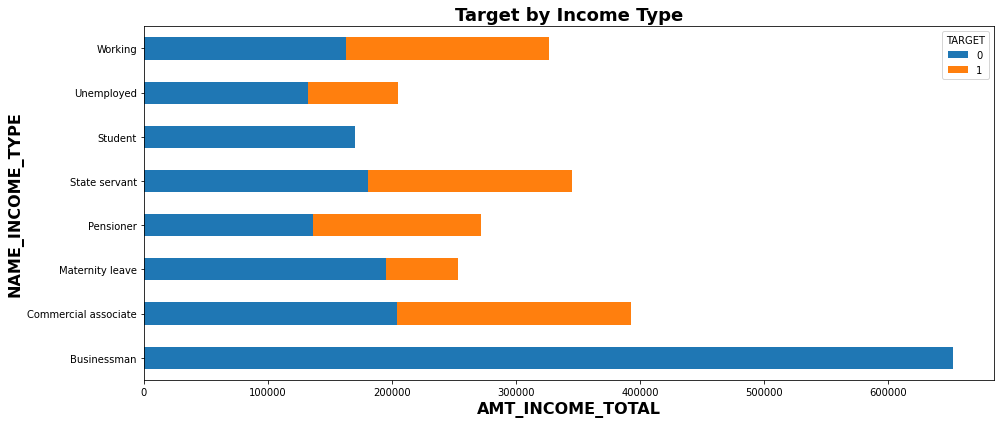

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14,6))

target_by_income.plot(kind='barh', stacked=True, ax = ax)
ax.set_title('Target by Income Type', fontsize=18, fontweight='bold')
ax.set_ylabel('NAME_INCOME_TYPE', fontsize=16, fontweight='bold')
ax.set_xlabel('AMT_INCOME_TOTAL', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
target_by_contract = train.groupby(['NAME_CONTRACT_TYPE','TARGET'])['AMT_CREDIT'].mean().unstack()

target_by_contract

TARGET,0,1
NAME_CONTRACT_TYPE,,
Cash loans,632461.030097,578598.766181
Revolving loans,327939.024390,256365.336658


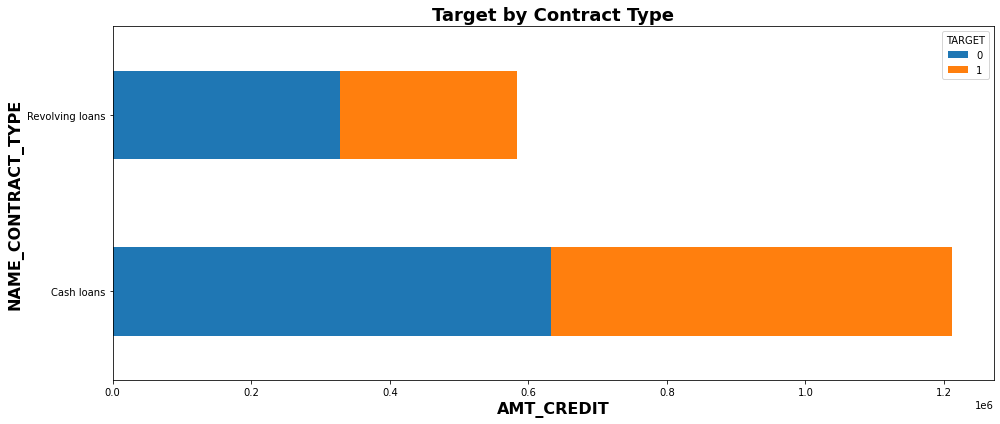

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14,6))

target_by_contract.plot(kind='barh', stacked=True, ax = ax)
ax.set_title('Target by Contract Type', fontsize=18, fontweight='bold')
ax.set_ylabel('NAME_CONTRACT_TYPE', fontsize=16, fontweight='bold')
ax.set_xlabel('AMT_CREDIT', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# Feature Engineering

In [ ]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
train['AMT_INCOME_TOTAL'].quantile(0.75)

202500.0

In [ ]:
def group_income(x):
  if x < 112500.0:
    return '<24%'
  elif x < 147150.0:
    return '25-49%'
  elif x < 202500.0:
    return '50-74%'
  else:
    return '75%>'

In [ ]:
def group_credit(x):
  if x < 270000.0:
    return '<24%'
  elif x < 513531.0:
    return '25-49%'
  elif x < 808650.0:
    return '50-74%'
  else:
    return '75%>'

In [ ]:
def feature_engineering(df):
  df['HAS_CHILDREN'] = df['CNT_CHILDREN'].apply(lambda x: True if x>0 else False)
  df['INCOME_GROUP'] = df['AMT_INCOME_TOTAL'].apply(lambda x: group_income(x))
  df['CREDIT_GROUP'] = df['AMT_CREDIT'].apply(lambda x: group_credit(x))
  df['AGE'] = (df['DAYS_BIRTH'])/(-365)
  df['EMPLOYED_YEARS'] = (df['DAYS_EMPLOYED'])/(-365)
  df['YEARS_SINCE_REGISTERED'] = (df['DAYS_REGISTRATION'])/(-365)



In [ ]:
feature_engineering(train)

# Feature Selection

In [ ]:
def feature_selection(df):
  df.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION'])

  corr_matrix = train.corr().abs()

  upper = corr_matrix.where((np.triu(np.ones(corr_matrix.shape), k=1) + np.tril(np.ones(corr_matrix.shape), k=-1)).astype(bool))

  to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

  df.drop(to_drop, axis=1, inplace=True)

In [ ]:
feature_selection(train)

In [ ]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_GROUP,CREDIT_GROUP
0,100002,1,Cash loans,M,N,Y,202500.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,75%>,25-49%
1,100003,0,Cash loans,F,N,N,270000.0,Family,State servant,Higher education,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,75%>,75%>
2,100004,0,Revolving loans,M,Y,Y,67500.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,<24%,<24%
3,100006,0,Cash loans,F,N,Y,135000.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25-49%,25-49%
4,100007,0,Cash loans,M,N,Y,121500.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,25-49%,25-49%


# Machine Learning Implementation and Evaluation

In [ ]:
X = train.drop('TARGET', axis=1)
X = pd.get_dummies(X)
y = train['TARGET']

dummies = X.select_dtypes(include='object').columns.tolist()
X[dummies] = X[dummies].apply(LabelEncoder().fit_transform)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2,random_state = 42)


In [ ]:
pipelines = {
    'lr': make_pipeline(StandardScaler(), LogisticRegression(random_state = 42)),
    'lgbm': make_pipeline(StandardScaler(), LGBMClassifier(random_state = 42))
}

In [ ]:
grid = {
    'lr': {
        'logisticregression__max_iter':[100,200,300]
    },
    'lgbm': {
        'lgbmclassifier__n_estimators':[100,200,300]
    }
}

In [ ]:
fit_models = {}

for clf, pipeline in pipelines.items():
    print(f'Training the {clf} model.')
   
    model = GridSearchCV(pipeline, grid[clf], n_jobs=-1, cv=5)
  
    model.fit(X_train, y_train)
  
    fit_models[clf] = model

Training the lr model.


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training the lgbm model.


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
# !pip install shap

In [ ]:
for clf, model in fit_models.items(): 
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    print(f'{clf}: Accuracy- {accuracy}, Recall- {recall}, Precision- {precision}, F1- {f1}')

lr: Accuracy- 0.9193697868396663, Recall- 0.011921600323297636, Precision- 0.4609375, F1- 0.023242072089816823
lgbm: Accuracy- 0.9194185649480513, Recall- 0.010709234188724995, Precision- 0.4690265486725664, F1- 0.020940339786645595


In [ ]:
y_test=pd.read_csv('/content/drive/MyDrive/Rakamin/HCI/application_test.csv')

feature_engineering(y_test)
feature_selection(y_test)

dummies2 = X.select_dtypes().columns.tolist()
y_test[dummies2] = y_test[dummies2].apply(LabelEncoder().fit_transform)

In [ ]:
y_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,HAS_CHILDREN,INCOME_GROUP,CREDIT_GROUP,AGE,EMPLOYED_YEARS,YEARS_SINCE_REGISTERED
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,False,0,1,52.715068,6.380822,14.164384
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,3.0,False,3,3,49.490411,12.243836,24.980822
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.0,1.0,4.0,False,2,1,54.898630,12.213699,5.958904
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,0.0,3.0,True,2,2,38.290411,5.112329,5.479452
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,True,1,1,35.726027,6.002740,10.958904


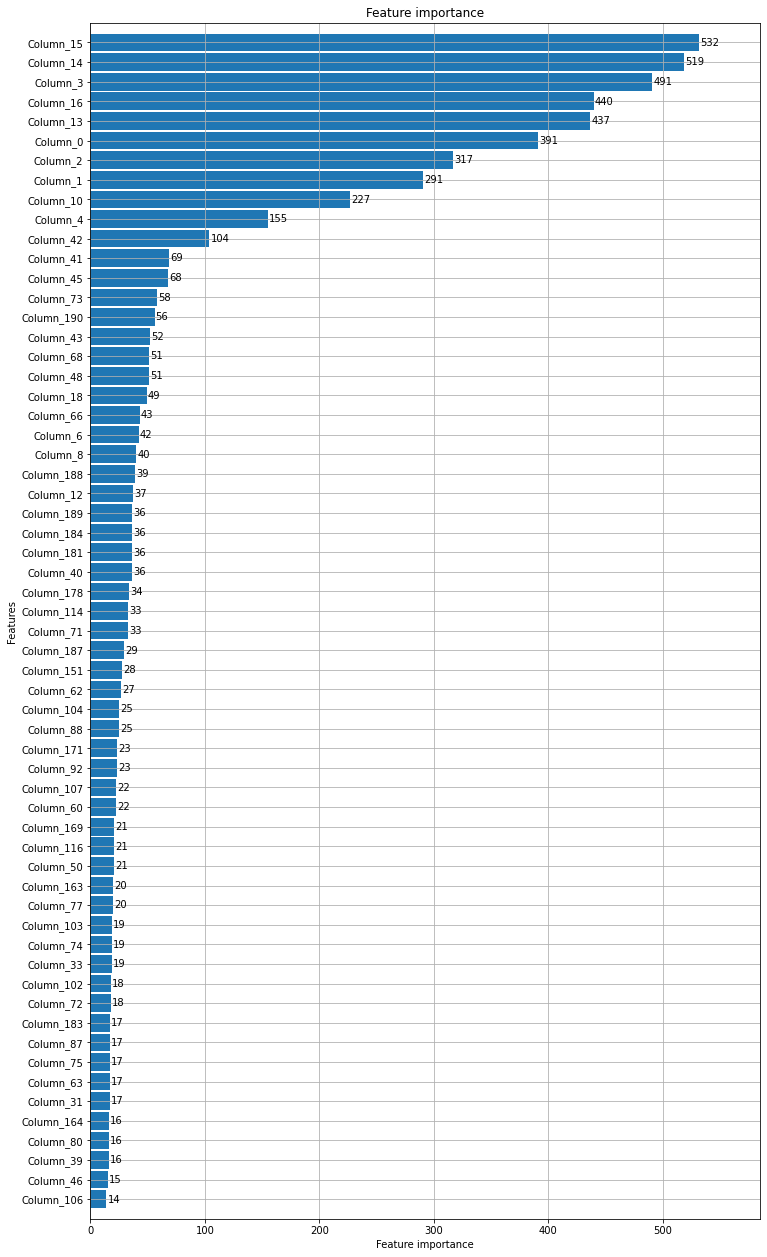

In [ ]:
y_pred = fit_models['lgbm'].predict(X_valid)
plt.rcParams["figure.figsize"] = (12, 22)

lightgbm.plot_importance(fit_models['lgbm'].best_estimator_._final_estimator, max_num_features = 60, height=.9)

In [ ]:
X.iloc[:, [15,14,3,16,13]]

,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_1
0,0.139376,0.262949,-2120,-1134.0,0.083037
1,0.535276,0.622246,-291,-828.0,0.311267
2,0.729567,0.555912,-2531,-815.0,0.505998
3,0.535276,0.650442,-2437,-617.0,0.505998
4,0.535276,0.322738,-3458,-1106.0,0.505998
...,...,...,...,...,...
307506,0.535276,0.681632,-1982,-273.0,0.145570
307507,0.535276,0.115992,-4090,0.0,0.505998
307508,0.218859,0.535722,-5150,-1909.0,0.744026
307509,0.661024,0.514163,-931,-322.0,0.505998
